In [584]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd #  processing, CSV file I/O (e.g. pd.read_csv)

# Input  files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/av-jobathon-sep2021/sample.csv
/kaggle/input/av-jobathon-sep2021/train.csv
/kaggle/input/av-jobathon-sep2021/test.csv


In [585]:
train = pd.read_csv('/kaggle/input/av-jobathon-sep2021/train.csv')
test = pd.read_csv('/kaggle/input/av-jobathon-sep2021/test.csv')
sample = pd.read_csv('/kaggle/input/av-jobathon-sep2021/sample.csv')

In [586]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [587]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [588]:
train.shape

(188340, 10)

In [589]:
train= train[train['Sales'] != 0]
train = train[train.Sales < train.Sales.quantile(.99)]

In [590]:
train.shape

(186436, 10)

In [591]:
train.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object

In [592]:
test.dtypes

ID               object
Store_id          int64
Store_Type       object
Location_Type    object
Region_Code      object
Date             object
Holiday           int64
Discount         object
dtype: object

In [593]:
train.describe(include='all')

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
count,186436,186436.000000,186436,186436,186436,186436,186436.000000,186436,186436.000000,186436.000000
unique,186436,NaN,4,5,4,516,NaN,2,NaN,NaN
top,T1146477,NaN,S1,L1,R1,2018-11-16,NaN,No,NaN,NaN
freq,1,NaN,88699,85015,62732,365,NaN,103583,NaN,NaN
mean,NaN,182.866523,NaN,NaN,NaN,NaN,0.132362,NaN,67.017877,42021.686784
std,NaN,105.449665,NaN,NaN,NaN,NaN,0.338885,NaN,27.962630,16798.320447
min,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,708.120000
25%,NaN,91.000000,NaN,NaN,NaN,NaN,0.000000,NaN,48.000000,30330.000000
50%,NaN,183.000000,NaN,NaN,NaN,NaN,0.000000,NaN,62.000000,39477.000000
75%,NaN,274.000000,NaN,NaN,NaN,NaN,0.000000,NaN,81.000000,51417.000000


In [594]:
test.describe(include='all')

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
count,22265,22265.000000,22265,22265,22265,22265,22265.000000,22265
unique,22265,NaN,4,5,4,61,NaN,2
top,T1196438,NaN,S1,L1,R1,2019-06-26,NaN,No
freq,1,NaN,10492,10065,7564,365,NaN,12773
mean,NaN,183.000000,NaN,NaN,NaN,NaN,0.032787,NaN
std,NaN,105.368395,NaN,NaN,NaN,NaN,0.178082,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,92.000000,NaN,NaN,NaN,NaN,0.000000,NaN
50%,NaN,183.000000,NaN,NaN,NaN,NaN,0.000000,NaN
75%,NaN,274.000000,NaN,NaN,NaN,NaN,0.000000,NaN


In [595]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186436 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             186436 non-null  object 
 1   Store_id       186436 non-null  int64  
 2   Store_Type     186436 non-null  object 
 3   Location_Type  186436 non-null  object 
 4   Region_Code    186436 non-null  object 
 5   Date           186436 non-null  object 
 6   Holiday        186436 non-null  int64  
 7   Discount       186436 non-null  object 
 8   #Order         186436 non-null  int64  
 9   Sales          186436 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 15.6+ MB


In [596]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [597]:
train['Store_id'].value_counts()

40     516
304    516
177    516
97     516
224    516
      ... 
146    416
312    409
126    374
337    339
175    290
Name: Store_id, Length: 365, dtype: int64

In [598]:
train['Store_Type'].value_counts()

S1    88699
S4    44163
S2    28896
S3    24678
Name: Store_Type, dtype: int64

In [599]:
train['Location_Type'].value_counts()

L1    85015
L2    46734
L3    29919
L5    13932
L4    10836
Name: Location_Type, dtype: int64

In [600]:
train['Region_Code'].value_counts()

R1    62732
R2    53886
R3    44125
R4    25693
Name: Region_Code, dtype: int64

In [601]:
train['Date'].value_counts()

2018-11-16    365
2018-09-12    365
2018-05-11    365
2019-03-18    365
2019-02-25    365
             ... 
2018-07-07    327
2019-04-28    326
2019-05-05    325
2018-06-30    322
2019-05-04    290
Name: Date, Length: 516, dtype: int64

In [602]:
train['Holiday'].value_counts()

0    161759
1     24677
Name: Holiday, dtype: int64

In [603]:
train['Discount'].value_counts()

No     103583
Yes     82853
Name: Discount, dtype: int64

<AxesSubplot:>

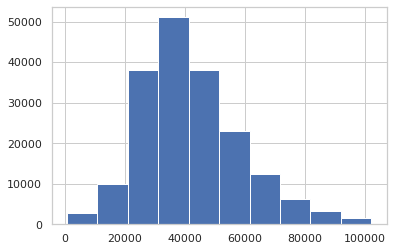

In [604]:
train['Sales'].hist()

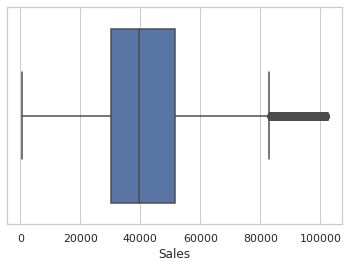

In [605]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=train["Sales"])

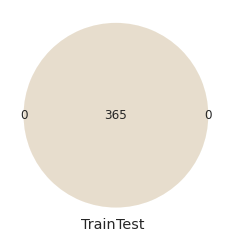

In [606]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

plt.figure(figsize=(4,4))
set1 = set(train['Store_id'])
set2 = set(test['Store_id'])

venn2([set1, set2], ('Train', 'Test'))
plt.show()

In [607]:
train['Sales_per_Order'] = train['Sales']/train['#Order']

In [608]:
# ruko

In [609]:
# train['Store_id'] = train['Store_id'].astype(str)

In [610]:
# %%time

# from category_encoders.target_encoder import TargetEncoder
# feature_list = ['Store_id']

# TE_encoder = TargetEncoder()
# train[feature_list] = TE_encoder.fit_transform(train[feature_list], train['Sales'])
# test[feature_list] = TE_encoder.transform(test[feature_list])

In [611]:
Store_wise_Sales = train.groupby(['Store_id', 'Store_Type'])['Sales_per_Order'].agg([('mean_store_wise_sales','mean'),('median_store_wise_sales','median')]).reset_index()
Location_wise_Sales = train.groupby(['Location_Type', 'Region_Code'])['Sales_per_Order'].agg([('mean_location_wise_sales','mean'),('median_location_wise_sales','median')]).reset_index()

In [612]:
# Store_wise_Sales.columns = ['Store_id', 'Store_Type','Med_Store_wise_Sales']
# Location_wise_Sales.columns = ['Location_Type', 'Region_Code','Med_Location_wise_Sales']

In [613]:
train = train.merge(Store_wise_Sales, on=['Store_id','Store_Type'], how='left')
train = train.merge(Location_wise_Sales, on=['Location_Type', 'Region_Code'], how='left')

test = test.merge(Store_wise_Sales, on=['Store_id','Store_Type'], how='left')
test = test.merge(Location_wise_Sales, on=['Location_Type', 'Region_Code'], how='left')

In [614]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186436 entries, 0 to 186435
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          186436 non-null  object 
 1   Store_id                    186436 non-null  int64  
 2   Store_Type                  186436 non-null  object 
 3   Location_Type               186436 non-null  object 
 4   Region_Code                 186436 non-null  object 
 5   Date                        186436 non-null  object 
 6   Holiday                     186436 non-null  int64  
 7   Discount                    186436 non-null  object 
 8   #Order                      186436 non-null  int64  
 9   Sales                       186436 non-null  float64
 10  Sales_per_Order             186436 non-null  float64
 11  mean_store_wise_sales       186436 non-null  float64
 12  median_store_wise_sales     186436 non-null  float64
 13  mean_location_

In [615]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22265 entries, 0 to 22264
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          22265 non-null  object 
 1   Store_id                    22265 non-null  int64  
 2   Store_Type                  22265 non-null  object 
 3   Location_Type               22265 non-null  object 
 4   Region_Code                 22265 non-null  object 
 5   Date                        22265 non-null  object 
 6   Holiday                     22265 non-null  int64  
 7   Discount                    22265 non-null  object 
 8   mean_store_wise_sales       22265 non-null  float64
 9   median_store_wise_sales     22265 non-null  float64
 10  mean_location_wise_sales    22265 non-null  float64
 11  median_location_wise_sales  22265 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 2.2+ MB


In [616]:
data = pd.concat([train, test], axis = 0).reset_index(drop = True)

In [617]:
data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Sales_per_Order,mean_store_wise_sales,median_store_wise_sales,mean_location_wise_sales,median_location_wise_sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9.0,7011.84,779.093333,584.618068,572.174812,580.882670,568.285714
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60.0,51789.12,863.152000,578.070467,562.089114,593.260118,580.142857
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42.0,36868.20,877.814286,670.006927,658.848837,593.260118,580.142857
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23.0,19715.16,857.180870,676.857780,662.960915,580.882670,568.285714
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62.0,45614.52,735.718065,707.985586,693.984211,691.635026,682.953488


In [618]:
# #Convert columns from non numeric to numeric

data['Region_Code'] = data['Region_Code'].map({'R1' : 0, 'R2' : 1, 'R3' : 2, 'R4' : 3})
data['Discount'] = data['Discount'].map({'Yes' : 1, "No" : 0})


In [619]:
data['Holiday_Discount'] = data['Holiday'] & data['Discount']
data['Store_Location'] = data['Store_Type'] + "_" + data['Location_Type']

data = pd.get_dummies(data, columns=['Store_id','Store_Location'], drop_first=True)

data['Store_Type'] = data['Store_Type'].map({'S1' : 0, 'S2' : 1, 'S3' : 2, 'S4' : 3})
data['Location_Type'] = data['Location_Type'].map({'L1' : 0, 'L2' : 1, 'L3' : 2, 'L4' : 3, 'L5' : 4})

In [620]:
data.head()

,ID,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Sales_per_Order,...,Store_Location_S1_L5,Store_Location_S2_L1,Store_Location_S2_L3,Store_Location_S2_L4,Store_Location_S2_L5,Store_Location_S3_L1,Store_Location_S3_L2,Store_Location_S3_L3,Store_Location_S4_L1,Store_Location_S4_L2
0,T1000001,0,2,0,2018-01-01,1,1,9.0,7011.84,779.093333,...,0,0,0,0,0,0,0,0,0,0
1,T1000002,3,1,0,2018-01-01,1,1,60.0,51789.12,863.152000,...,0,0,0,0,0,0,0,0,0,1
2,T1000003,2,1,0,2018-01-01,1,1,42.0,36868.20,877.814286,...,0,0,0,0,0,0,1,0,0,0
3,T1000004,1,2,0,2018-01-01,1,1,23.0,19715.16,857.180870,...,0,0,1,0,0,0,0,0,0,0
4,T1000005,1,2,3,2018-01-01,1,1,62.0,45614.52,735.718065,...,0,0,1,0,0,0,0,0,0,0


In [621]:
data['Date'] = pd.to_datetime(data['Date'])
# data['year']= data['Date'].dt.year 
data['month']= data['Date'].dt.month 
data['day']=data['Date'].dt.day
# data['weekday'] = np.where(((data['Date']).dt.dayofweek) < 5,0,1)
data['dayofweek_num']=data['Date'].dt.dayofweek
# data['is_month_start'] = data['Date'].dt.is_month_start
# data['is_month_end'] = data['Date'].dt.is_month_end
# data['is_quarter_start'] = data['Date'].dt.is_quarter_start
# data['is_quarter_end'] = data['Date'].dt.is_quarter_end
# data['is_year_start'] = data['Date'].dt.is_year_start
# data['is_year_end'] = data['Date'].dt.is_year_end

In [622]:
data.drop(['Date', 'ID'], axis = 1, inplace = True)

In [623]:
data.head()

,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales,Sales_per_Order,mean_store_wise_sales,median_store_wise_sales,...,Store_Location_S2_L4,Store_Location_S2_L5,Store_Location_S3_L1,Store_Location_S3_L2,Store_Location_S3_L3,Store_Location_S4_L1,Store_Location_S4_L2,month,day,dayofweek_num
0,0,2,0,1,1,9.0,7011.84,779.093333,584.618068,572.174812,...,0,0,0,0,0,0,0,1,1,0
1,3,1,0,1,1,60.0,51789.12,863.152000,578.070467,562.089114,...,0,0,0,0,0,0,1,1,1,0
2,2,1,0,1,1,42.0,36868.20,877.814286,670.006927,658.848837,...,0,0,0,1,0,0,0,1,1,0
3,1,2,0,1,1,23.0,19715.16,857.180870,676.857780,662.960915,...,0,0,0,0,0,0,0,1,1,0
4,1,2,3,1,1,62.0,45614.52,735.718065,707.985586,693.984211,...,0,0,0,0,0,0,0,1,1,0


In [624]:
data.describe(include = 'all')

,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales,Sales_per_Order,mean_store_wise_sales,median_store_wise_sales,...,Store_Location_S2_L4,Store_Location_S2_L5,Store_Location_S3_L1,Store_Location_S3_L2,Store_Location_S3_L3,Store_Location_S4_L1,Store_Location_S4_L2,month,day,dayofweek_num
count,208701.000000,208701.000000,208701.000000,208701.000000,208701.000000,186436.000000,186436.000000,186436.000000,208701.000000,208701.000000,...,208701.000000,208701.000000,208701.000000,208701.000000,208701.000000,208701.000000,208701.000000,208701.000000,208701.000000,208701.000000
mean,1.132242,1.044791,1.175184,0.121739,0.442475,67.017877,42021.686784,635.220430,635.159198,622.355580,...,0.024882,0.055294,0.071782,0.049434,0.011059,0.074259,0.163363,5.605953,15.711808,2.980604
std,1.241194,1.232053,1.045753,0.326985,0.496681,27.962630,16798.320447,87.373386,62.629926,62.212876,...,0.155767,0.228555,0.258127,0.216774,0.104578,0.262193,0.369697,3.233416,8.778633,1.998290
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,708.120000,351.810000,489.462051,478.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,30330.000000,571.368932,585.252608,572.625530,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,8.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,62.000000,39477.000000,625.900000,630.207244,617.647059,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,16.000000,3.000000
75%,2.000000,2.000000,2.000000,0.000000,1.000000,81.000000,51417.000000,688.500000,684.693633,670.857143,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,23.000000,5.000000
max,3.000000,4.000000,3.000000,1.000000,1.000000,232.000000,102150.000000,1283.338983,822.339815,809.325581,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,31.000000,6.000000


In [625]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208701 entries, 0 to 208700
Columns: 393 entries, Store_Type to dayofweek_num
dtypes: float64(7), int64(9), uint8(377)
memory usage: 100.5 MB


In [626]:
data.drop('#Order', axis = 1, inplace = True)

In [627]:
train_data = data[~data['Sales'].isna()]
test_data = data[data['Sales'].isna()]

In [628]:
train_data.shape, test_data.shape

((186436, 392), (22265, 392))

In [629]:
test_data.drop(['Sales','Sales_per_Order'],axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [630]:
train_data.head()

,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,Sales_per_Order,mean_store_wise_sales,median_store_wise_sales,mean_location_wise_sales,...,Store_Location_S2_L4,Store_Location_S2_L5,Store_Location_S3_L1,Store_Location_S3_L2,Store_Location_S3_L3,Store_Location_S4_L1,Store_Location_S4_L2,month,day,dayofweek_num
0,0,2,0,1,1,7011.84,779.093333,584.618068,572.174812,580.882670,...,0,0,0,0,0,0,0,1,1,0
1,3,1,0,1,1,51789.12,863.152000,578.070467,562.089114,593.260118,...,0,0,0,0,0,0,1,1,1,0
2,2,1,0,1,1,36868.20,877.814286,670.006927,658.848837,593.260118,...,0,0,0,1,0,0,0,1,1,0
3,1,2,0,1,1,19715.16,857.180870,676.857780,662.960915,580.882670,...,0,0,0,0,0,0,0,1,1,0
4,1,2,3,1,1,45614.52,735.718065,707.985586,693.984211,691.635026,...,0,0,0,0,0,0,0,1,1,0


In [631]:
test_data.head()

,Store_Type,Location_Type,Region_Code,Holiday,Discount,mean_store_wise_sales,median_store_wise_sales,mean_location_wise_sales,median_location_wise_sales,Holiday_Discount,...,Store_Location_S2_L4,Store_Location_S2_L5,Store_Location_S3_L1,Store_Location_S3_L2,Store_Location_S3_L3,Store_Location_S4_L1,Store_Location_S4_L2,month,day,dayofweek_num
186436,3,1,2,0,0,614.492940,599.804878,667.980998,657.740385,0,...,0,0,0,0,0,0,1,6,1,5
186437,0,0,0,0,0,609.484758,597.083464,603.333639,590.520000,0,...,0,0,0,0,0,0,0,6,1,5
186438,3,1,0,0,0,621.604804,608.118011,593.260118,580.142857,0,...,0,0,0,0,0,0,1,6,1,5
186439,0,0,3,0,0,685.495641,672.491301,680.297354,670.300943,0,...,0,0,0,0,0,0,0,6,1,5
186440,0,0,1,0,0,728.960134,713.676923,650.035880,637.920000,0,...,0,0,0,0,0,0,0,6,1,5


In [632]:
X = train_data.drop(['Sales','Sales_per_Order'], axis = 1)
y = np.log1p(train_data['Sales'])

In [633]:
X.head()

,Store_Type,Location_Type,Region_Code,Holiday,Discount,mean_store_wise_sales,median_store_wise_sales,mean_location_wise_sales,median_location_wise_sales,Holiday_Discount,...,Store_Location_S2_L4,Store_Location_S2_L5,Store_Location_S3_L1,Store_Location_S3_L2,Store_Location_S3_L3,Store_Location_S4_L1,Store_Location_S4_L2,month,day,dayofweek_num
0,0,2,0,1,1,584.618068,572.174812,580.882670,568.285714,1,...,0,0,0,0,0,0,0,1,1,0
1,3,1,0,1,1,578.070467,562.089114,593.260118,580.142857,1,...,0,0,0,0,0,0,1,1,1,0
2,2,1,0,1,1,670.006927,658.848837,593.260118,580.142857,1,...,0,0,0,1,0,0,0,1,1,0
3,1,2,0,1,1,676.857780,662.960915,580.882670,568.285714,1,...,0,0,0,0,0,0,0,1,1,0
4,1,2,3,1,1,707.985586,693.984211,691.635026,682.953488,1,...,0,0,0,0,0,0,0,1,1,0


In [634]:
# from sklearn.model_selection import train_test_split
# X_train, X_valid, Y_train, Y_valid = train_test_split(X,y,test_size=0.25, random_state=2021)

In [635]:
# from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_log_error

# # Choose hyperparameter domain to search over
# space = {
#         'max_depth':hp.choice('max_depth', np.arange(5, 15, 1, dtype=int)),
#         'n_estimators':hp.choice('n_estimators', np.arange(1000, 10000, 100, dtype=int)),
#         'colsample_bytree':hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
#         'min_child_weight':hp.choice('min_child_weight', np.arange(250, 350, 10, dtype=int)),
#         'subsample':hp.quniform('subsample', 0.7, 0.9, 0.1),
#         'eta':hp.quniform('eta', 0.1, 0.3, 0.1),
        
#         'objective':'reg:squarederror',
        
#         'tree_method':'gpu_hist',
#         'eval_metric': 'rmse',
#     }

# def score(params):
#     model = XGBRegressor(**params)
    
#     model.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_valid, Y_valid)],
#               verbose=False, early_stopping_rounds=10)
#     Y_pred = model.predict(X_valid)
#     score = mean_squared_log_error(Y_valid, Y_pred)*1000
# #     print(score)
#     return {'loss': score, 'status': STATUS_OK}    
    
# def optimize(trials, space):
    
#     best = fmin(score, space, algo=tpe.suggest, max_evals=100)
#     return best

# trials = Trials()
# best_params = optimize(trials, space)

# # Return the best parameters
# space_eval(space, best_params)

In [636]:
# ### Grid Search #####
# import xgboost as xgb
# from xgboost import XGBRegressor
# from sklearn.model_selection import GridSearchCV

# xgb1 = XGBRegressor()

# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:squarederror'],
#               'learning_rate': [0.03, 0.05, 0.07], #so called `eta` value
#               'max_depth': [6,8],
#               'min_child_weight': [0.6,0.8],
#               'subsample': [0.6,0.8],
#               'colsample_bytree': [0.6,0.8],
#               'n_estimators': [1000]}

# xgb_grid = GridSearchCV(xgb1,
#                         parameters,
#                         cv = 5,
#                         n_jobs = -1,
#                         verbose=True)

# xgb_grid.fit(X,y)

In [637]:
# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

In [638]:
# import XGBoost
# import xgboost as xgb


# define data_dmatrix
# data_dmatrix = xgb.DMatrix(data=X,label=y)

In [639]:
# from xgboost import cv
# from sklearn.metrics import mean_squared_log_error

# # eval_metric = mean_squared_log_error()

# # params = {"objective":'reg:squarederror','colsample_bytree': 0.8,'learning_rate': 0.1,
# #                 'max_depth': 10}

# params = {'colsample_bytree': 0.8,
#  'eta': 0.1,
#  'eval_metric': 'rmse',
#  'max_depth': 14,
#  'min_child_weight': 330,
#  'n_estimators': 9730,
#  'objective': 'reg:squarederror',
#  'subsample': 0.9,
#  'tree_method': 'gpu_hist'}

# xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=5, 
#                     num_boost_round=1000, early_stopping_rounds=20, metrics='rmsle', as_pandas=True, seed=123)

In [640]:
# xgb_cv.head()

**Best Local CV:** 0.721730	0.721731

In [641]:
# params = {'colsample_bytree': 0.8,
#  'eta': 0.1,
#  'eval_metric': 'rmse',
#  'max_depth': 14,
#  'min_child_weight': 330,
#  'n_estimators': 9730,
#  'objective': 'reg:squarederror',
#  'subsample': 0.9,
#  'tree_method': 'gpu_hist'}

In [642]:
# # xgb_reg = xgb.XGBRegressor(
# #     objective='reg:squarederror',
# #     max_depth=10,
# #     n_estimators=1000,
# #     min_child_weight=0.5, 
# #     colsample_bytree=0.8, 
# #     subsample=0.8, 
# #     eta=0.1,
# #     seed=123)
# xgb_reg = xgb.XGBRegressor(**params,seed=123)
# xgb_reg.fit(X, y)

In [643]:
# hyper_params = {
#     'task': 'train',
#     'boosting_type': 'gbdt',
#     'objective': 'regression',
#     'metric': ['rmse','rmsle'],
#     'learning_rate': 0.1,
#     'feature_fraction': 0.9,
#     'bagging_fraction': 0.7,
#     'bagging_freq': 10,
#     'verbose': 0,
#     "max_depth": 8,
#     "num_leaves": 128,  
#     "max_bin": 512,
#     'verbose': -1,
#     "num_iterations": 10000
# }

In [644]:
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()

In [645]:
# from sklearn.linear_model import Lasso
# lasso = Lasso(random_state=123)

In [646]:
# from hyperopt import fmin, tpe, hp, anneal, Trials
# from sklearn.model_selection import KFold, cross_val_score, train_test_split
# import lightgbm as lgb
# import xgboost as xgb

In [647]:
# x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=2021)

In [648]:
# from hyperopt import hp
# import numpy as np
# from sklearn.metrics import mean_squared_log_error


# # XGB parameters
# xgb_reg_params = {
#     'learning_rate':    hp.choice('learning_rate',    np.arange(0.05, 0.31, 0.05)),
#     'max_depth':        hp.choice('max_depth',        np.arange(5, 16, 1, dtype=int)),
#     'min_child_weight': hp.choice('min_child_weight', np.arange(1, 8, 1, dtype=int)),
#     'colsample_bytree': hp.choice('colsample_bytree', np.arange(0.3, 0.8, 0.1)),
#     'subsample':        hp.uniform('subsample', 0.8, 1),
#     'n_estimators':     100,
# }
# xgb_fit_params = {
#     'eval_metric': 'rmse',
#     'early_stopping_rounds': 10,
#     'verbose': False
# }
# xgb_para = dict()
# xgb_para['reg_params'] = xgb_reg_params
# xgb_para['fit_params'] = xgb_fit_params
# xgb_para['loss_func' ] = lambda y, pred: np.sqrt(mean_squared_log_error(y, pred))


# # LightGBM parameters
# lgb_reg_params = {
#     'learning_rate':    hp.choice('learning_rate',    np.arange(0.05, 0.31, 0.05)),
#     'max_depth':        hp.choice('max_depth',        np.arange(5, 16, 1, dtype=int)),
#     'min_child_weight': hp.choice('min_child_weight', np.arange(1, 8, 1, dtype=int)),
#     'colsample_bytree': hp.choice('colsample_bytree', np.arange(0.3, 0.8, 0.1)),
#     'subsample':        hp.uniform('subsample', 0.8, 1),
#     'n_estimators':     100,
# }
# lgb_fit_params = {
#     'eval_metric': 'l2',
#     'early_stopping_rounds': 10,
#     'verbose': False
# }
# lgb_para = dict()
# lgb_para['reg_params'] = lgb_reg_params
# lgb_para['fit_params'] = lgb_fit_params
# lgb_para['loss_func' ] = lambda y, pred: np.sqrt(mean_squared_log_error(y, pred))

In [649]:
# import lightgbm as lgb
# import xgboost as xgb
# from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials


# class HPOpt(object):

#     def __init__(self, x_train, x_test, y_train, y_test):
#         self.x_train = x_train
#         self.x_test  = x_test
#         self.y_train = y_train
#         self.y_test  = y_test

#     def process(self, fn_name, space, trials, algo, max_evals):
#         fn = getattr(self, fn_name)
#         try:
#             result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
#         except Exception as e:
#             return {'status': STATUS_FAIL,
#                     'exception': str(e)}
#         return result, trials

#     def xgb_reg(self, para):
#         reg = xgb.XGBRegressor(**para['reg_params'])
#         return self.train_reg(reg, para)

#     def lgb_reg(self, para):
#         reg = lgb.LGBMRegressor(**para['reg_params'])
#         return self.train_reg(reg, para)

#     def train_reg(self, reg, para):
#         reg.fit(self.x_train, self.y_train,
#                 eval_set=[(self.x_train, self.y_train), (self.x_test, self.y_test)],
#                 **para['fit_params'])
#         pred = reg.predict(self.x_test)
#         loss = para['loss_func'](self.y_test, pred)
#         return {'loss': loss, 'status': STATUS_OK}

In [650]:
# obj = HPOpt(x_train, x_test, y_train, y_test)

# xgb_opt = obj.process(fn_name='xgb_reg', space=xgb_para, trials=Trials(), algo=tpe.suggest, max_evals=50)
# lgb_opt = obj.process(fn_name='lgb_reg', space=lgb_para, trials=Trials(), algo=tpe.suggest, max_evals=50)

In [651]:
import lightgbm as lgb
lgb_gbm = lgb.LGBMRegressor(seed=123)
lgb_gbm.fit(X,y)

LGBMRegressor(seed=123)

In [652]:
lgb_pred = np.expm1(lgb_gbm.predict(test_data))

In [653]:
import xgboost as xgb
xgb_gbm = xgb.XGBRegressor(seed=123)
xgb_gbm.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [654]:
xgb_pred = np.expm1(xgb_gbm.predict(test_data))

In [655]:
sample['Sales'] = 0.55*xgb_pred + 0.45*lgb_pred

In [656]:
#  sample.Sales = sample.Sales.round()

In [657]:
# from mlxtend.regressor import StackingRegressor
# stregr = StackingRegressor(regressors=[lgb_gbm], 
#                            meta_regressor=xgb_gbm)
# stregr.fit(X,y)

In [658]:
# sample['Sales'] = 0.5*lgb_pred + 0.5*xgb_pred

In [659]:
sample.to_csv('55_45_XGB_LGBM_FE_final.csv', index = False)

In [660]:
sample.head()

,ID,Sales
0,T1188341,60689.882493
1,T1188342,44551.192500
2,T1188343,77386.394727
3,T1188344,43109.684680
4,T1188345,46566.067620


In [661]:
sample.describe()

,Sales
count,22265.000000
mean,43735.973498
std,14241.324224
min,12157.916449
25%,33302.852472
50%,41803.392236
75%,52126.667609
max,108437.116197
